In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('./data/data_processed_main.csv')

# Preprocessing v2

In [3]:
df.columns

Index(['adresDzialanosci_gmina', 'adresDzialanosci_miasto', '2712Z', '2790Z',
       '2841Z', '2899Z', '3312Z', '3320Z', '4321Z', 'pkd_total',
       'data_rozpoczecia', 'status', 'zamkniete_przez_covid'],
      dtype='object')

In [4]:
df.sample()

,adresDzialanosci_gmina,adresDzialanosci_miasto,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,data_rozpoczecia,status,zamkniete_przez_covid
8697,Ropa,Ropa,0,0,0,0,0,0,1,2,2012-10-08,WYKRESLONY,0


W analizie daty rozpoczecia, dzien zalozenia nie bedzie istotna dla nas informacja. Duzo bardziej znaczacymi beda:
- rok
- miesiac

In [5]:
df['data_rozpoczecia'] = pd.to_datetime(df['data_rozpoczecia'])
df['data_rozpoczecia_rok'] = df['data_rozpoczecia'].dt.year
df['data_rozpoczecia_miesiac'] = df['data_rozpoczecia'].dt.month
df = df.drop(['data_rozpoczecia'], axis=1)

In [6]:
df = df.drop(['status'], axis=1)

In [7]:
le_gminy = preprocessing.LabelEncoder()
le_miasta = preprocessing.LabelEncoder()
df['adres_gmina'] = le_gminy.fit_transform(df['adresDzialanosci_gmina'])
df['adres_miasto'] = le_miasta.fit_transform(df['adresDzialanosci_miasto'])
df = df.drop(['adresDzialanosci_gmina', 'adresDzialanosci_miasto'], axis=1)

In [8]:
df.sample(3)

,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,zamkniete_przez_covid,data_rozpoczecia_rok,data_rozpoczecia_miesiac,adres_gmina,adres_miasto
26895,0,0,0,0,0,0,1,26,1,2001,8,253,2169
7685,0,0,0,0,0,0,1,14,0,2017,5,45,513
36222,0,0,0,0,1,0,0,42,1,2009,7,101,802


In [9]:
ilosc_firm_w_miescie = df['adres_miasto'].value_counts()
ilosc_firm_w_gminie = df['adres_gmina'].value_counts()

df['ilosc_firm_w_miescie'] = df['adres_miasto'].map(ilosc_firm_w_miescie)
df['ilosc_firm_w_gminie'] = df['adres_gmina'].map(ilosc_firm_w_gminie)

In [10]:
df.sample(3)

,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z,pkd_total,zamkniete_przez_covid,data_rozpoczecia_rok,data_rozpoczecia_miesiac,adres_gmina,adres_miasto,ilosc_firm_w_miescie,ilosc_firm_w_gminie
30687,0,0,0,0,0,0,1,15,0,2006,10,250,1939,211,373
27969,0,0,0,0,0,1,1,9,0,2016,2,197,109,7,117
16884,0,0,0,0,0,0,1,3,0,2007,5,142,1105,269,627


Text(0, 0.5, 'ilosc zakladanych firm')

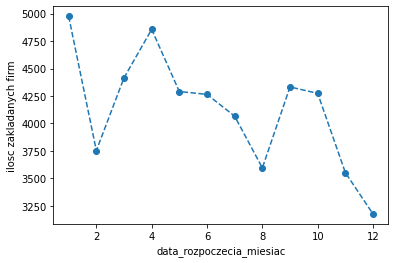

In [11]:
df.groupby(['data_rozpoczecia_miesiac'])['data_rozpoczecia_miesiac'].count().plot(linestyle="dashed", marker="o")
plt.ylabel('ilosc zakladanych firm')

<AxesSubplot:ylabel='PKD'>

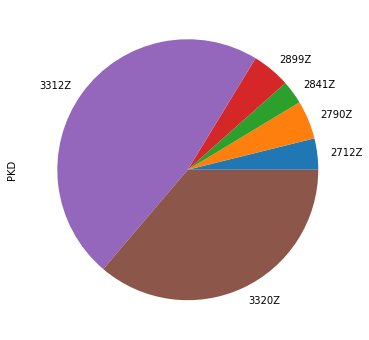

In [12]:
sums = df.sum()
sums = sums[:6]
sums.plot.pie(figsize=(6,6), ylabel='PKD')

In [13]:
import seaborn as sns

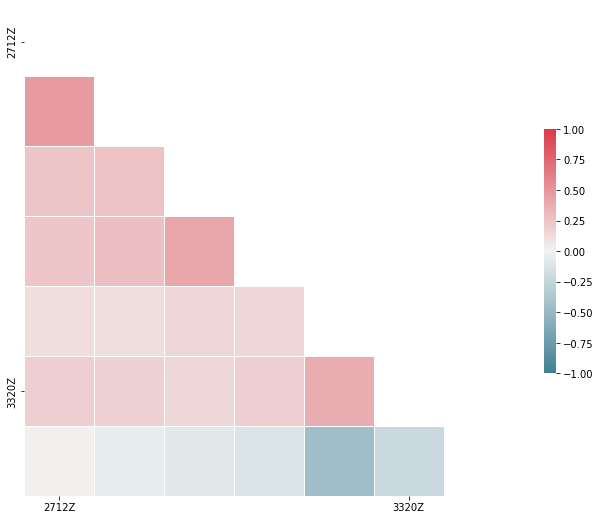

,2712Z,2790Z,2841Z,2899Z,3312Z,3320Z,4321Z
2712Z,1.000000,0.475053,0.242814,0.236008,0.105552,0.189679,0.015598
2790Z,0.475053,1.000000,0.257839,0.268165,0.106186,0.178492,-0.040840
2841Z,0.242814,0.257839,1.000000,0.406760,0.144354,0.149784,-0.084343
2899Z,0.236008,0.268165,0.406760,1.000000,0.147911,0.191575,-0.119285
3312Z,0.105552,0.106186,0.144354,0.147911,1.000000,0.382626,-0.460385
3320Z,0.189679,0.178492,0.149784,0.191575,0.382626,1.000000,-0.223316
4321Z,0.015598,-0.040840,-0.084343,-0.119285,-0.460385,-0.223316,1.000000


In [14]:
pkd_correlations = df[['2712Z', '2790Z', '2841Z', '2899Z', '3312Z', '3320Z', '4321Z']]

corr = pkd_correlations.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

# LEARNING

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['zamkniete_przez_covid'], axis=1)
y = df['zamkniete_przez_covid']

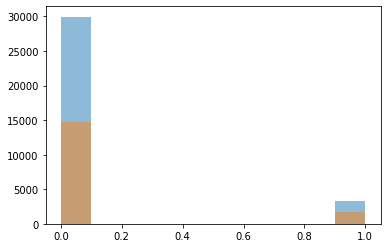

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

In [102]:
print(f'Ilosc zamknietych firm przez covid: {y.sum()}')
print(f'Ilosc firm w sumie: {y.shape[0]}')
print(f'Ilosc zamknietych firm ze wszystkich: {y.sum() *100 / y.shape[0]}%')

Ilosc zamknietych firm przez covid: 4923
Ilosc firm w sumie: 49553
Ilosc zamknietych firm ze wszystkich: 9.93481726636127%


In [69]:
weight_for_0 = 1.0 / (y.shape[0] - y.sum())
weight_for_1 = 1.0 / y.sum()

## Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [65]:
max_depth_params = np.arange(1, 14)
max_depth_best = 3
max_depth_best_score = 0

acc_train = []
acc_test = []

for max_depth_param in max_depth_params:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth_param, random_state=0)
    decision_tree.fit(X_train, y_train)

    train_score = decision_tree.score(X_train, y_train)
    test_score = decision_tree.score(X_test, y_test)
    
    acc_train.append(train_score)
    acc_test.append(test_score)
    
    #print(f'max_depth={max_depth_param}')
    #print("Accuracy on training set: {:.3f}".format(train_score))
    #print("Accuracy on test set: {:.3f}".format(test_score))
    #print()

    if test_score > max_depth_best_score:
        max_depth_best = max_depth_param
        max_depth_best_score = test_score

print('-------------------------------')
print(f'Best max depth={max_depth_best}')
print(f'Max depth best score={max_depth_best_score}')


-------------------------------
Best max depth=1
Max depth best score=0.8967773497217636


In [20]:
best_decision_tree = DecisionTreeClassifier(max_depth=max_depth_best, random_state=0)
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

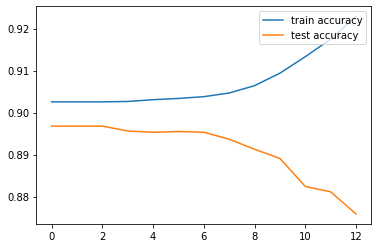

In [21]:
plt.plot(acc_train, label='train accuracy')
plt.plot(acc_test, label='test accuracy')

plt.legend(loc='upper right')

In [22]:
objects = list(df.drop(['zamkniete_przez_covid'], axis=1).columns)

y_pos = np.arange(len(objects))
performance = decision_tree.feature_importances_

for i in range(len(objects)):
    print(objects[i] + ": " + str(performance[i]))

2712Z: 0.007594235508049418
2790Z: 0.007113008983461285
2841Z: 0.007215933065887062
2899Z: 0.008300042632629928
3312Z: 0.019297600926561635
3320Z: 0.02188705410487627
4321Z: 0.012710262299973211
pkd_total: 0.17432118861512197
data_rozpoczecia_rok: 0.14012703971195503
data_rozpoczecia_miesiac: 0.12299705685350036
adres_gmina: 0.11594584394315294
adres_miasto: 0.12801284217305162
ilosc_firm_w_miescie: 0.12756144779544182
ilosc_firm_w_gminie: 0.10691644338633735


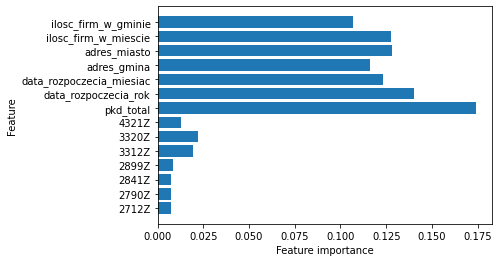

In [23]:
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.barh(y_pos, performance, align='center')
plt.yticks(y_pos, objects)
plt.show()

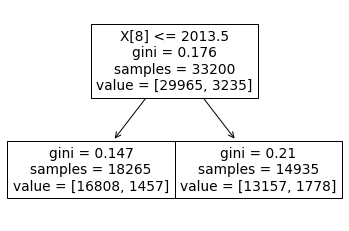

In [24]:
tree.plot_tree(best_decision_tree);

In [25]:
X.columns[8]

'data_rozpoczecia_rok'

## Random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(random_forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(random_forest.score(X_test, y_test)))

Accuracy on training set: 0.997
Accuracy on test set: 0.894


In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [52]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [28]:
best_random_forest = RandomForestClassifier(n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=10,bootstrap=True)
best_random_forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(best_random_forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_random_forest.score(X_test, y_test)))

Accuracy on training set: 0.903
Accuracy on test set: 0.897


### ================================

### Normalizacja danych

In [62]:
mean = np.mean(X_train, axis=0)
X_train2 = X_train - mean
std = np.std(X_train2, axis=0)
X_train2 /= std

Krótkie porównanie do random forest

In [94]:
random_forest2 = RandomForestClassifier()
random_forest2.fit(X_train2, y_train)


print("Accuracy on training set 1: {:.3f}".format(random_forest.score(X_train, y_train)))
print("Accuracy on test set 1: {:.3f}".format(random_forest.score(X_test, y_test)))
print("================================")
print("Accuracy on training set 2: {:.3f}".format(random_forest2.score(X_train2, y_train)))
print("Accuracy on test set 2: {:.3f}".format(random_forest2.score(X_test, y_test)))

Accuracy on training set 1: 0.997
Accuracy on test set 1: 0.894
Accuracy on training set 2: 0.997
Accuracy on test set 2: 0.897


In [111]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=(X_train.shape[-1],)
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 256)               3840      
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               65792     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                                 
Total params: 135,681
Trainable params: 135,681
Non-tr

In [71]:
from keras.callbacks import History

In [117]:
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

class_weight = {0: weight_for_0, 1: weight_for_1}

history = History()

history = model.fit(
    X_train,
    y_train,
    #batch_size=2048,
    batch_size=64,
    epochs=30,
    verbose=2,
    validation_data=(X_test, y_test),
    class_weight=class_weight,
)


Epoch 1/30
519/519 - 4s - loss: 2.7746e-05 - fn: 2329.0000 - fp: 8630.0000 - tn: 21335.0000 - tp: 906.0000 - precision: 0.0950 - recall: 0.2801 - val_loss: 0.6825 - val_fn: 1688.0000 - val_fp: 0.0000e+00 - val_tn: 14665.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 4s/epoch - 7ms/step
Epoch 2/30
519/519 - 1s - loss: 2.7750e-05 - fn: 2182.0000 - fp: 9763.0000 - tn: 20202.0000 - tp: 1053.0000 - precision: 0.0974 - recall: 0.3255 - val_loss: 0.6841 - val_fn: 1688.0000 - val_fp: 0.0000e+00 - val_tn: 14665.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 1s/epoch - 3ms/step
Epoch 3/30
519/519 - 1s - loss: 2.7743e-05 - fn: 2448.0000 - fp: 7085.0000 - tn: 22880.0000 - tp: 787.0000 - precision: 0.1000 - recall: 0.2433 - val_loss: 0.6921 - val_fn: 1688.0000 - val_fp: 0.0000e+00 - val_tn: 14665.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - 1s/epoch - 3ms/step
Epoch 4/30
519/519 - 2s - loss: 2.77

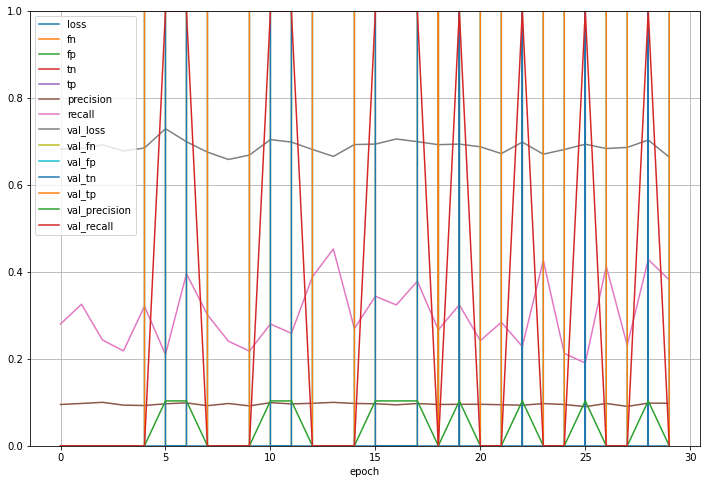

In [119]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("epoch")
plt.show()

In [106]:
model.evaluate(X_test, y_test)

512/512 [==============================] - 1s 1ms/step - loss: 592.3930 - accuracy: 0.8778 - fn: 1686.0000 - fp: 2.0000 - tn: 14663.0000 - tp: 2.0000


[592.3930053710938, 0.8777594566345215, 1686.0, 2.0, 14663.0, 2.0]

In [120]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation

In [121]:
history = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1400      
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 50)                5000      
                                                                 
 batch_normalization_7 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 50)               

In [122]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [123]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=15)

Epoch 1/15
1038/1038 [==============================] - 4s 2ms/step - loss: 0.3463 - accuracy: 0.9001 - val_loss: 0.3326 - val_accuracy: 0.8968
Epoch 2/15
1038/1038 [==============================] - 2s 2ms/step - loss: 0.3194 - accuracy: 0.9026 - val_loss: 0.3323 - val_accuracy: 0.8968
Epoch 3/15
1038/1038 [==============================] - 2s 2ms/step - loss: 0.3195 - accuracy: 0.9026 - val_loss: 0.3321 - val_accuracy: 0.8968
Epoch 4/15
1038/1038 [==============================] - 2s 2ms/step - loss: 0.3193 - accuracy: 0.9026 - val_loss: 0.3320 - val_accuracy: 0.8968
Epoch 5/15
1038/1038 [==============================] - 3s 2ms/step - loss: 0.3193 - accuracy: 0.9026 - val_loss: 0.3323 - val_accuracy: 0.8968
Epoch 6/15
1038/1038 [==============================] - 2s 2ms/step - loss: 0.3194 - accuracy: 0.9026 - val_loss: 0.3326 - val_accuracy: 0.8968
Epoch 7/15
1038/1038 [==============================] - 2s 2ms/step - loss: 0.3192 - accuracy: 0.9026 - val_loss: 0.3319 - val_accuracy:

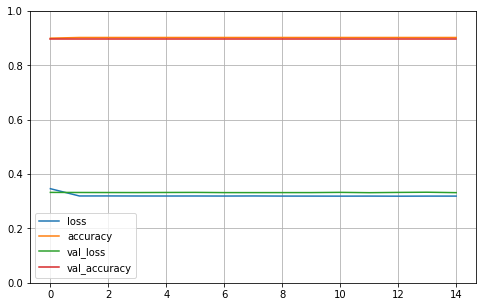

In [124]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [125]:
model.evaluate(X_test,y_test)

512/512 [==============================] - 1s 1ms/step - loss: 0.3317 - accuracy: 0.8968


[0.3316711187362671, 0.896777331829071]